# Copy the dataset 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp /content/drive/MyDrive/dataset_B_Eye_Images.zip dataset_B_Eye_Images.zip

# Install GPUtil to check the gpu model

In [14]:
!pip install GPUtil

In [15]:
import GPUtil
GPUs = GPUtil.getGPUs()
for gpu in GPUs:
  print(gpu.name)

Tesla T4


# Convert the dataset

unzip the dataset

In [ ]:
!unzip dataset_B_Eye_Images.zip

In [5]:
import os
from os import path
import h5py
from PIL import Image
import random
import numpy as np
dataset_path = "dataset_B_Eye_Images"
eye = []
results = []
for dir in os.listdir(dataset_path):
    result = 0
    if "open" in dir:
        result = 1
    os.path.isdir
    path = os.path.join(dataset_path, dir)
    for image_path in os.listdir(path):
        if not image_path.endswith(".jpg"):
            continue
        new_path = os.path.join(path, image_path)
        with Image.open(new_path) as img:
            eye.append(np.asarray(img))
            results.append(result)

zipped_list = list(zip(eye, results))
random.shuffle(zipped_list)
eye, results = list(zip(*zipped_list))
split = int(len(eye)*0.3)

X_test = eye[0:split]
Y_test = results[0:split]

X_train = eye[split:]
Y_train = results[split:]

with h5py.File('dataset.h5') as file:
    file.create_dataset("X_train", data=np.asarray(X_train))
    file.create_dataset("Y_train", data=np.asarray(Y_train))
    file.create_dataset("X_test", data=np.asarray(X_test))
    file.create_dataset("Y_test", data=np.asarray(Y_test))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


# Load the dataset

In [6]:
import h5py
import numpy as np

dataset = h5py.File("dataset.h5")
X_train = dataset["X_train"]
Y_train = dataset["Y_train"]
X_test = dataset["X_test"]
Y_test = dataset["Y_test"]
X_train = np.reshape(X_train, (-1,24,24,1))/255
X_test = np.reshape(X_test, (-1,24,24,1))/255
Y_train = np.asarray(Y_train).reshape((-1, 1))
print(Y_train.shape)
Y_test = np.asarray(Y_test).reshape((-1, 1))

(3393, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


# Create the model

In [7]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import losses

shape=(24, 24, 1)
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=shape))
model.add(layers.BatchNormalization())
model.add(layers.ReLU(6))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU(6))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU(6))

model.add(layers.GlobalAvgPool2D())
model.add(layers.Dense(1, activation="sigmoid"))

op = optimizers.Adamax(1e-4)

model.compile(metrics=["accuracy"], loss="binary_crossentropy", optimizer=op)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        3

# Training and evaluate the model

In [8]:
history = model.fit(X_train, Y_train, batch_size=16, epochs=100, validation_split=0.3)

Epoch 1/100
149/149 [==============================] - 34s 9ms/step - loss: 0.6187 - accuracy: 0.6568 - val_loss: 0.7569 - val_accuracy: 0.5000
Epoch 2/100
149/149 [==============================] - 1s 5ms/step - loss: 0.5539 - accuracy: 0.7345 - val_loss: 0.9187 - val_accuracy: 0.5000
Epoch 3/100
149/149 [==============================] - 1s 5ms/step - loss: 0.5335 - accuracy: 0.7539 - val_loss: 0.7546 - val_accuracy: 0.5039
Epoch 4/100
149/149 [==============================] - 1s 5ms/step - loss: 0.5002 - accuracy: 0.7795 - val_loss: 0.5753 - val_accuracy: 0.7122
Epoch 5/100
149/149 [==============================] - 1s 5ms/step - loss: 0.4993 - accuracy: 0.7859 - val_loss: 0.4841 - val_accuracy: 0.8301
Epoch 6/100
149/149 [==============================] - 1s 5ms/step - loss: 0.4833 - accuracy: 0.7998 - val_loss: 0.4400 - val_accuracy: 0.8605
Epoch 7/100
149/149 [==============================] - 1s 5ms/step - loss: 0.4446 - accuracy: 0.8211 - val_loss: 0.4154 - val_accuracy: 0.857

In [9]:
model.evaluate(X_test, Y_test)

46/46 [==============================] - 0s 4ms/step - loss: 0.1617 - accuracy: 0.9422


[0.16167183220386505, 0.942188560962677]

Plot the model accuracy, loss, ROC

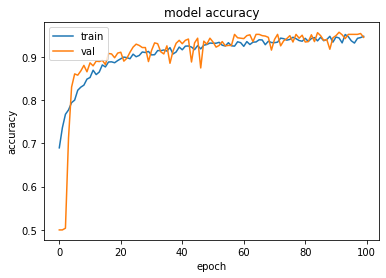

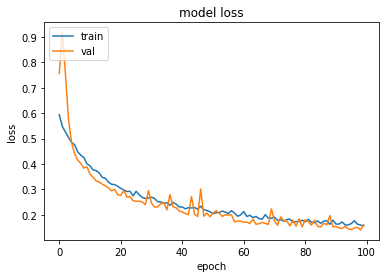

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

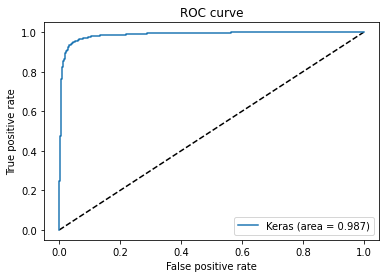

In [13]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
Y_array = np.asarray(Y_test.data)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_array, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()